# Prepare the Moral Foundation Theory set of words

Load the eMFT set of words, associated the words to the moral foundation with the highest prop and keep the top 40. 

## Load eMFT Dataset

In [2]:
import pandas as pd

In [68]:
# load csv file from ../../data/axis/mft_raw.csv
df = pd.read_csv('../../data/axis/mft_raw.csv')

# print the first 5 rows of the dataframe
print(df.head())

         word    care_p  fairness_p  loyalty_p  authority_p  sanctity_p  \
0     brought  0.180000    0.114286   0.080000     0.096552    0.053333   
1       close  0.073359    0.031373   0.115385     0.077220    0.084821   
2      marine  0.029851    0.011765   0.043860     0.009434    0.000000   
3      campus  0.045455    0.090909   0.048780     0.046875    0.081633   
4  provincial  0.088235    0.000000   0.066667     0.193548    0.000000   

   care_sent  fairness_sent  loyalty_sent  authority_sent  sanctity_sent  
0  -0.235404      -0.310015     -0.099783       -0.402207      -0.132550  
1   0.136189      -0.043962     -0.011387       -0.258195       0.100926  
2  -0.392250      -0.025800     -0.132460        0.000000       0.000000  
3   0.360900      -0.505238     -0.271150        0.318133      -0.300225  
4  -0.381800       0.000000     -0.263350       -0.103800       0.000000  


In [69]:
# replace "_p" to "_virtue" and "_sent" to "_vice"
df.columns = df.columns.str.replace('_p', '_vice')
df.columns = df.columns.str.replace('_sent', '_virtue')

In [70]:
df

,word,care_vice,fairness_vice,loyalty_vice,authority_vice,sanctity_vice,care_virtue,fairness_virtue,loyalty_virtue,authority_virtue,sanctity_virtue
0,brought,0.180000,0.114286,0.080000,0.096552,0.053333,-0.235404,-0.310015,-0.099783,-0.402207,-0.132550
1,close,0.073359,0.031373,0.115385,0.077220,0.084821,0.136189,-0.043962,-0.011387,-0.258195,0.100926
2,marine,0.029851,0.011765,0.043860,0.009434,0.000000,-0.392250,-0.025800,-0.132460,0.000000,0.000000
3,campus,0.045455,0.090909,0.048780,0.046875,0.081633,0.360900,-0.505238,-0.271150,0.318133,-0.300225
4,provincial,0.088235,0.000000,0.066667,0.193548,0.000000,-0.381800,0.000000,-0.263350,-0.103800,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3265,outsiders,0.150000,0.142857,0.444444,0.375000,0.000000,-0.466667,0.000000,-0.132300,-0.202056,0.000000
3266,border,0.123377,0.085000,0.063457,0.093023,0.081911,-0.175247,-0.219750,-0.094114,-0.091685,-0.078121
3267,implement,0.121951,0.163636,0.190476,0.166667,0.056604,-0.111020,0.104767,0.052263,0.232813,0.274167
3268,recruit,0.050000,0.000000,0.066667,0.208333,0.105263,0.000000,0.000000,0.318200,0.250440,0.187000


In [71]:
df['highest_value_col'] = df.iloc[:, 1:].idxmax(axis=1)

In [88]:
def calculate_importance(row):
    highest_value_col = row['highest_value_col']
    highest_value = row[highest_value_col]
    
    # Determine if we're dealing with a virtue or a vice based on the highest value column
    value_type = 'virtue' if 'virtue' in highest_value_col else 'vice'
    
    # Filter columns by the determined value type
    related_values = [row[col] for col in df.columns if value_type in col]
    
    # Calculate the average of the related values, excluding the highest value
    average_of_related_values = sum(related_values) / len(related_values)
    
    # The importance metric is the difference between the highest value and the average of related values
    importance = highest_value - average_of_related_values
    return importance

# Apply the function to each row in the DataFrame to calculate the importance metric
df['importance'] = df.apply(calculate_importance, axis=1)

In [89]:
def transform_df_to_dict(df, top_n=5):
    """
    Transforms a DataFrame into a dictionary with words categorized by their highest value columns,
    and sorts them by their associated values, returning only the top N words for each category.

    Parameters:
    - df: pandas DataFrame with columns including 'word', 'highest_value_col', and various virtue/vice columns.
    - top_n: The number of top words to return for each category based on their values.

    Returns:
    - A dictionary with categories as keys and lists of top N words (sorted by their values) as values.
    """
    transformed_data = {}

    for index, row in df.iterrows():
        highest_value_col = row["highest_value_col"]
        domain, value_type = highest_value_col.rsplit('_', 1)  # Split into the domain and virtue/vice
        value = row[highest_value_col]  # Get the value associated with the highest_value_col

        # Ensure the domain exists in the dictionary
        if domain not in transformed_data:
            transformed_data[domain] = {"virtue": [], "vice": []}
        
        # Append the word along with its value to the list
        transformed_data[domain][value_type].append((row["word"], value))
    
    # Sort and trim the lists to top N based on their associated values
    for domain in transformed_data:
        for value_type in ["virtue", "vice"]:
            transformed_data[domain][value_type].sort(key=lambda x: x[1], reverse=True)  # Sort by value, descending
            transformed_data[domain][value_type] = [word for word, _ in transformed_data[domain][value_type][:top_n]]  # Keep only top N words

    return transformed_data

# Demonstrating the function with the existing DataFrame and specifying top N words
foundation_dict = transform_df_to_dict(df, top_n=40)  # Using top_n=1 for demonstration

In [90]:
for domain, values in foundation_dict.items():
    print(domain)
    for value_type, words in values.items():
        print(f"  {value_type}: {words}")

care
  virtue: ['celebrating', 'liberty', 'outstanding', 'brave', 'loyalty', 'approval', 'advised', 'arriving', 'wise', 'thank', 'encourage', 'success', 'bureaus', 'remarkable', 'pride', 'nice', 'bilateral', 'solidarity', 'feminist', 'respected', 'resolutions', 'virtues', 'promote', 'respect', 'promoting', 'dream', 'teaching', 'backers', 'accepted', 'determination', 'free', 'chamber', 'womens', 'spiritual', 'solar', 'read', 'science', 'obligations', 'capitalism', 'benefited']
  vice: ['tortured', 'pocket', 'cruel', 'harsh', 'sexually', 'persecution', 'hostility', 'income', 'stranded', 'knife', 'imprisonment', 'drivers', 'killed', 'punishments', 'attacked', 'suicide', 'assassination', 'villagers', 'mans', 'subjected', 'atrocities', 'hurt', 'waste', 'disabled', 'subsidy', 'casualties', 'shelters', 'pain', 'threatening', 'truck', 'deported', 'kill', 'slaves', 'burn', 'tear', 'torture', 'interrogation', 'airstrike', 'murdered', 'injured']
loyalty
  virtue: ['responses', 'establishing', 'po

In [11]:
# save the foundation_dict to a json file
# import json

#with open('../../data/axis/foundation_dict.json', 'w') as f:
    #json.dump(foundation_dict, f)


## Check existence of the words in the Media Frames Corpus

As we use the words extracted above and extract their word embeddings in the Media Frames Corpus, we need to know how often these words actually appear in the corpus.

In [76]:
immigration_path = "../../data/mfc/immigration_labeled.json"
deathpenalty_path = "../../data/mfc/deathpenalty_labeled.json"
guncontrol_path = "../../data/mfc/guncontrol_labeled.json"
samesex_path = "../../data/mfc/samesex_labeled.json"
tobacco_path = "../../data/mfc/tobacco_labeled.json"
frames_code = "../../data/mfc/codes.json"

In [77]:
# read unlabeled data
import json

# read labeled data
with open(immigration_path) as f:
    immigration = json.load(f)

with open(deathpenalty_path) as f:
    deathpenalty = json.load(f)

with open(guncontrol_path) as f:
    guncontrol = json.load(f)

with open(samesex_path) as f:
    samesex = json.load(f)

with open(tobacco_path) as f:
    tobacco = json.load(f)

# read frames
with open(frames_code) as f:
    codes = json.load(f)

In [78]:
def get_frame_name(code):
    if "." not in str(code):
        return codes[str(code) + ".2"]
    return codes[code]

def get_tone_name(code):
    if code == "17":
        return "Pro"
    elif code == "18":
        return "Neutral"
    elif code == "19":
        return "Anti"
    else:
        return codes[code]


In [79]:
# generate statistics count
print("immigration data count: ", len(immigration))
print("deathpenalty data count: ", len(deathpenalty))
print("guncontrol data count: ", len(guncontrol))
print("samesex data count: ", len(samesex))
print("tobacco data count: ", len(tobacco))

immigration data count:  6757
deathpenalty data count:  6398
guncontrol data count:  6689
samesex data count:  10583
tobacco data count:  5274


In [80]:
def process_json(json_path):
    articles = []

    # Load the JSON file
    with open(json_path) as f:
        labeled = json.load(f)
    
    # Loop through labeled data
    for idx, article in labeled.items():
        # preprocess text
        text = article["text"]

        # replace \n, \t, \r with space
        text = text.replace("\n", " ").replace("\t", " ").replace("\r", " ")

        articles.append(text)
    
    return articles

# Call the function for each JSON object
immigration_articles = process_json(immigration_path)
deathpenalty_articles = process_json(deathpenalty_path)
guncontrol_articles = process_json(guncontrol_path)
samesex_articles = process_json(samesex_path)
tobacco_articles = process_json(tobacco_path)

In [83]:
#save_dict = {
#    "articles": immigration_articles
#}

# save to json
#with open('../../data/mfc/articles.json', 'w') as f:
#    json.dump(save_dict, f)

### Use Counter for each frame and word

In [84]:
# Count the tf
from collections import Counter

def count_tf(articles):
    # Tokenize the text into words
    words = " ".join(articles).split()
    
    # Count the frequency of each word
    word_freq = Counter(words)
    
    return word_freq

word_freq = count_tf(immigration_articles)

### Now check how often each of the eMFT words appear in the Media Frames Corpus

In [91]:
# use foundation_dict
word_count = []
for domain, values in foundation_dict.items():
    print(domain)
    for value_type in ["virtue", "vice"]:
        print("  ", value_type)
        for word in values[value_type]:
            print("    ", word, word_freq[word])
            word_count.append((word, word_freq[word]))

care
   virtue
     celebrating 16
     liberty 23
     outstanding 26
     brave 18
     loyalty 8
     approval 112
     advised 21
     arriving 122
     wise 8
     thank 10
     encourage 89
     success 67
     bureaus 4
     remarkable 22
     pride 18
     nice 24
     bilateral 14
     solidarity 12
     feminist 3
     respected 21
     resolutions 11
     virtues 3
     promote 63
     respect 65
     promoting 22
     dream 81
     teaching 34
     backers 22
     accepted 60
     determination 27
     free 287
     chamber 20
     womens 0
     spiritual 11
     solar 3
     read 146
     science 60
     obligations 18
     capitalism 3
     benefited 18
   vice
     tortured 28
     pocket 11
     cruel 18
     harsh 75
     sexually 18
     persecution 106
     hostility 22
     income 116
     stranded 16
     knife 5
     imprisonment 16
     drivers 62
     killed 228
     punishments 3
     attacked 47
     suicide 40
     assassination 3
     villagers 5
     mans 0

In [92]:
# statistics for word_count
print("AVG word count: ", sum([count for _, count in word_count]) / len(word_count))
print("MAX word count: ", max([count for _, count in word_count]))
print("MIN word count: ", min([count for _, count in word_count]))

AVG word count:  45.21
MAX word count:  1949
MIN word count:  0


# Calculate FrameAxis Bias and Intensity

To extract the FrameAxis Bias and Intensity, we need to the following steps:

1. Define microframe
2. Calculate word contribution of each word to the microframe
3. Calculate the FrameAxis Bias 
4. Calculate the Baseline FrameAxis Bias
5. Calculate the FrameAxis Intensity

## 1. Define microframe

Each microframe consists out of a set of "positive" and "negative" words.

To make use of the **contextualized** word embeddings, we will use the following approach:

### Step 1

For each word within the virtue and vice lists, we perform the following steps:

- Sentence Extraction: Identify all sentences in the dataset containing the given word. For instance, if the word is "celebrating", we find all sentences with this word.

- Word Embedding Extraction: For each identified sentence, we extract the word embedding for each word in the sentence. Additionally, if a word is tokenized into subwords, we find the embeddings for each sub-token.

- Embedding Aggregation: Calculate an average word embedding for the focal word (e.g., "celebrating") by considering its embedding or the aggregate embedding of its sub-tokens within each sentence.

This process is repeated for every word listed under each sentiment (virtue and vice) across all moral foundations, resulting in a comprehensive set of embeddings that represent the semantic space of each sentiment within each foundation.

### Step 2: Aggregate Foundation-Sentiment Embeddings
After processing all words, we aggregate the embeddings for each foundation-sentiment combination (e.g., "care" + "virtue" and "care" + "vice"). This aggregation results in a single representative embedding for each combination.

### Step 4: Construct Microframes
The final step involves constructing the microframe for each foundation. This is achieved by subtracting the aggregated "vice" embedding from the "virtue" embedding for each foundation:

$$microframe = virtue_embedding - vice_embedding$$


> We end up with 5 microframes.

## 2. Calculate word contribution of each word to the microframe

In this step we again get the embedding for each word in each sentence (without stopwords) and calculate how each word is "leaning" towards the created microframes from "1. Define microframe".

The word contribution is calculated as follows:

```python
diff_norm = F.normalize(diff_vector, p=2, dim=1).to(
    self.model.device
)
embedding = (
    embedding.unsqueeze(0).to(self.model.device)
    if embedding.dim() == 1
    else embedding.to(self.model.device)
)
embedding_norm = F.normalize(embedding, p=2, dim=1)

cos_sim = (
    torch.matmul(embedding_norm, diff_norm.T).squeeze().cpu().item()
)
```

> Note: we remove the stop words after we converted the sentence to embeddings, as we need the stop words to get the correct embeddings.

## 3. Calculate the FrameAxis Bias

We calculate the FrameAxis Bias by summing the word contributions for each word in each sentence in the microframe. So that we end up with a single metric for each sentence and each microframe. 

So each sentence need to have 1 metric for each microframe. 

## 4. Calculate the Baseline FrameAxis Bias

We calculate the Baseline FrameAxis Bias by summing the word contributions for each word in each sentence in the microframe. So that we end up with a single metric for each microframe. 

This is basically how the whole corpus is leaning towards each of the microframes.

## 5. Calculate the FrameAxis Intensity

We finish of by calculating for each sentence and each frame the FrameAxis Intensity. 

# Analyse the frameaxis 

I used the generated list of words above to calculate for the whole labeled MFC dataset the frameaxis value (bias and intensity). Now I want to analyse if the value show some pattern in connection to the primary frame of the articles.

In [93]:
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [165]:
# load frameaxis data

with open('../../data/frameaxis/mfc/frameaxis_contextualized_mft_new_v2.pkl', 'rb') as f:
    df_frameaxis = pickle.load(f)

In [166]:
df_frameaxis.shape

(67480, 11)

In [167]:
# load mfc data
df_mfc = pd.DataFrame(json.load(open("../../data/mfc/data_prepared.json")))

In [168]:
# reset index
df_frameaxis.reset_index(drop=True, inplace=True)
df_mfc.reset_index(drop=True, inplace=True)

In [169]:
# merge frameaxis_df and mfc_df column wise on the basis of row num/index
df_merged = pd.concat([df_frameaxis, df_mfc], axis=1)

In [170]:
df_merged.head()

,article_id,care_bias,care_intensity,loyalty_bias,loyalty_intensity,authority_bias,authority_intensity,fairness_bias,fairness_intensity,sanctity_bias,...,Fairness and Equality,Health and Safety,"Legality, Constitutionality, Jurisdiction",Morality,Other,Policy Prescription and Evaluation,Political,Public Sentiment,Quality of Life,Security and Defense
0,Immigration1.0-10005,-0.046806,0.001429,0.072163,0.004429,0.120223,0.005293,0.089829,0.003872,0.100013,...,0,0,0,0,0,0,0,0,1,0
1,Immigration1.0-10005,-0.033659,0.001912,0.096215,0.002419,0.124081,0.001463,0.134707,0.006858,0.106475,...,0,0,0,0,0,0,0,0,1,0
2,Immigration1.0-10005,0.013455,0.005673,0.187339,0.014931,0.031740,0.006546,0.003253,0.005017,0.068036,...,0,0,0,0,0,0,0,0,1,0
3,Immigration1.0-10005,-0.030489,0.000623,0.134004,0.009003,0.061839,0.004271,0.006635,0.004705,0.039451,...,0,0,0,0,0,0,0,0,1,0
4,Immigration1.0-10005,-0.050968,0.001929,0.141105,0.011773,0.163692,0.007566,0.144491,0.011913,0.112075,...,0,0,0,0,0,0,0,0,1,0


In [171]:
drop_columns = ['Capacity and Resources',
       'Crime and Punishment', 'Cultural Identity', 'Economic',
       'External Regulation and Reputation', 'Fairness and Equality',
       'Health and Safety', 'Legality, Constitutionality, Jurisdiction',
       'Morality', 'Other', 'Policy Prescription and Evaluation', 'Political',
       'Public Sentiment', 'Quality of Life', 'Security and Defense',]

df_merged = df_merged.drop(columns=drop_columns)

In [172]:
df_merged

,article_id,care_bias,care_intensity,loyalty_bias,loyalty_intensity,authority_bias,authority_intensity,fairness_bias,fairness_intensity,sanctity_bias,sanctity_intensity,article_id,text,document_frame
0,Immigration1.0-10005,-0.046806,0.001429,0.072163,0.004429,0.120223,0.005293,0.089829,0.003872,0.100013,0.001405,Immigration1.0-10005,IMM-10005\n\nPRIMARY\n\nImmigrants without HOP...,Quality of Life
1,Immigration1.0-10005,-0.033659,0.001912,0.096215,0.002419,0.124081,0.001463,0.134707,0.006858,0.106475,0.000591,Immigration1.0-10005,It mounted as students went around the room te...,Quality of Life
2,Immigration1.0-10005,0.013455,0.005673,0.187339,0.014931,0.031740,0.006546,0.003253,0.005017,0.068036,0.002993,Immigration1.0-10005,Georgia Tech.,Quality of Life
3,Immigration1.0-10005,-0.030489,0.000623,0.134004,0.009003,0.061839,0.004271,0.006635,0.004705,0.039451,0.005877,Immigration1.0-10005,University of Georgia.,Quality of Life
4,Immigration1.0-10005,-0.050968,0.001929,0.141105,0.011773,0.163692,0.007566,0.144491,0.011913,0.112075,0.001787,Immigration1.0-10005,"""All I could say was, 'I'm planning to see if ...",Quality of Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67475,Immigration1.0-9998,-0.062358,0.001915,0.104728,0.004193,0.113421,0.002445,0.092194,0.003707,0.111625,0.002539,Immigration1.0-9998,"Sue Brown, spokeswoman for the INS, said it's ...",Crime and Punishment
67476,Immigration1.0-9998,-0.024687,0.001381,0.204733,0.022664,0.237031,0.020564,0.206741,0.018972,0.133000,0.001048,Immigration1.0-9998,"""They love it,"" she said.",Crime and Punishment
67477,Immigration1.0-9998,-0.073612,0.003475,0.116507,0.007126,0.176678,0.008782,0.110437,0.005405,0.070875,0.003934,Immigration1.0-9998,"""They use these units to interview the people,...",Crime and Punishment
67478,Immigration1.0-9998,-0.035231,0.003923,0.125450,0.005931,0.125360,0.004460,0.104501,0.005406,0.111736,0.001030,Immigration1.0-9998,"""We do about 15 interviews a day,"" Brown said.",Crime and Punishment


In [173]:
# group by document_frame

grouped = df.groupby('document_frame')

In [174]:
grouped["document_frame"].count()

document_frame
Capacity and Resources                        30746
Crime and Punishment                          92767
Cultural Identity                             89730
Economic                                      67985
External Regulation and Reputation            13179
Fairness and Equality                         28489
Health and Safety                             35242
Legality, Constitutionality, Jurisdiction    117694
Morality                                      11158
Other                                         28982
Policy Prescription and Evaluation            63272
Political                                    126324
Public Sentiment                              30972
Quality of Life                               75669
Security and Defense                          33817
Name: document_frame, dtype: int64

In [175]:
bias_columns = [
    "care_bias",
    "loyalty_bias",
    "authority_bias",
    "fairness_bias",
    "sanctity_bias",
]

intensity_columns = [
    "care_intensity",
    "loyalty_intensity",
    "authority_intensity",
    "fairness_intensity",
    "sanctity_intensity",
]

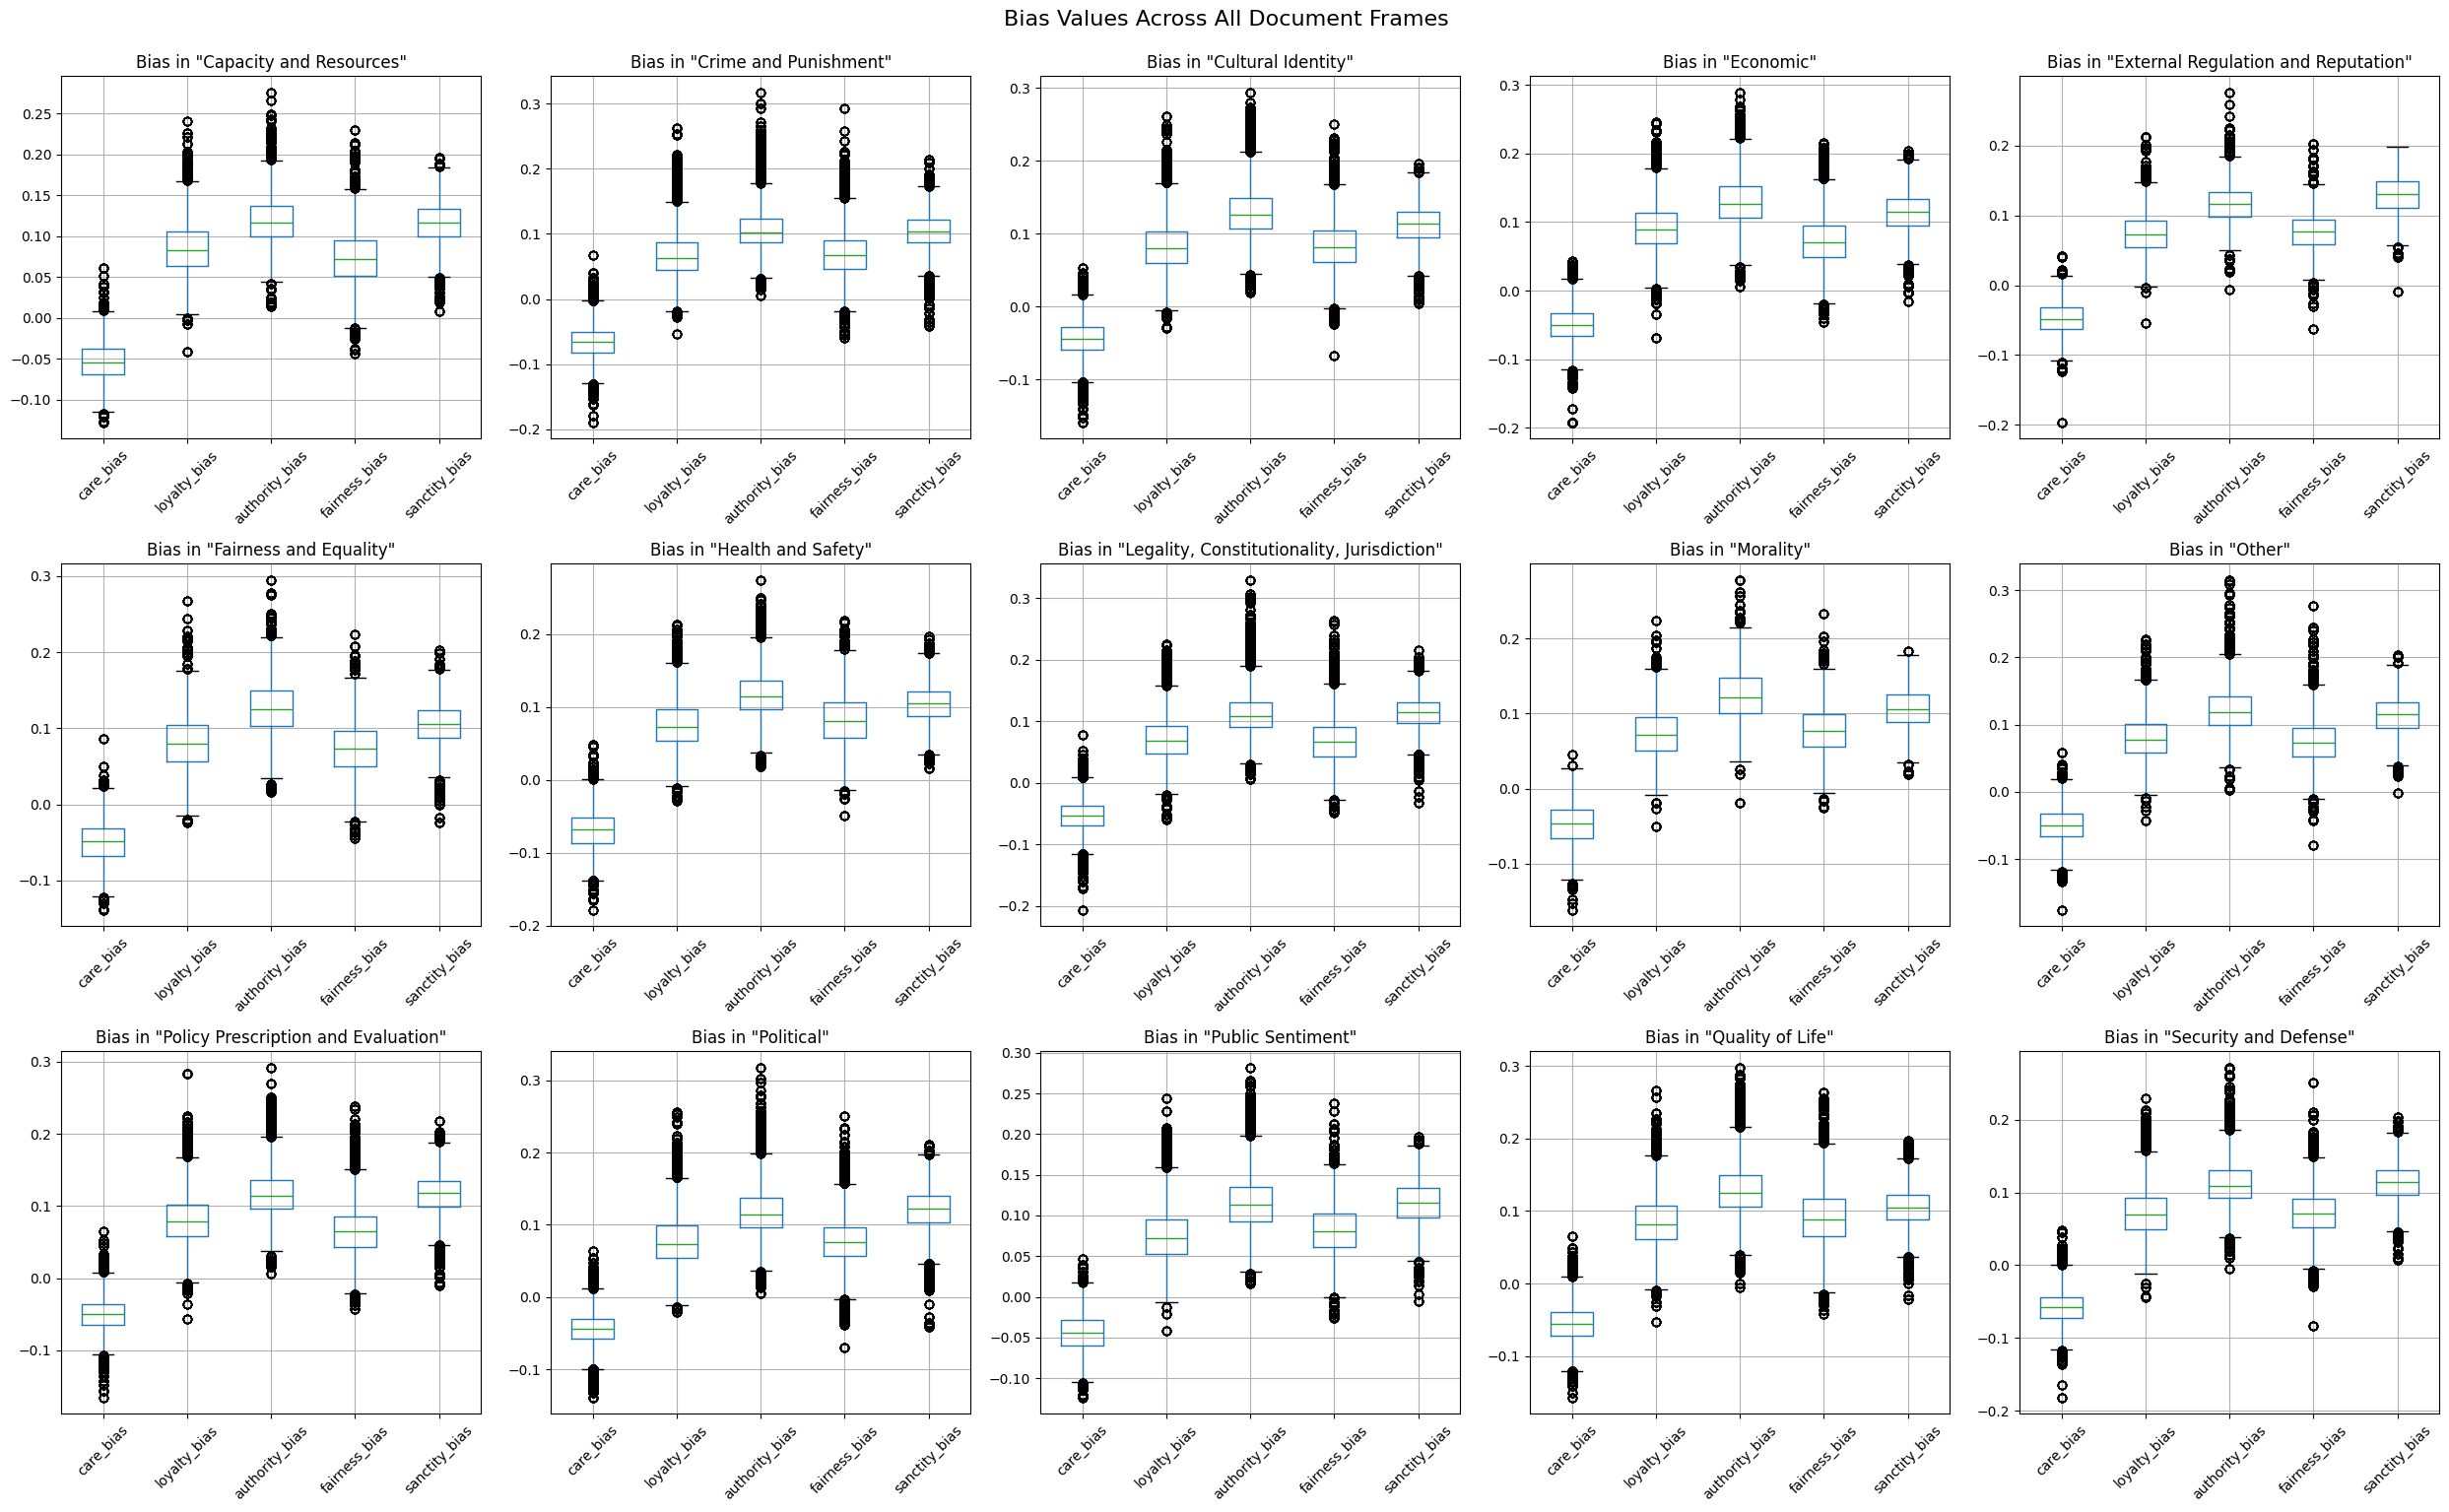

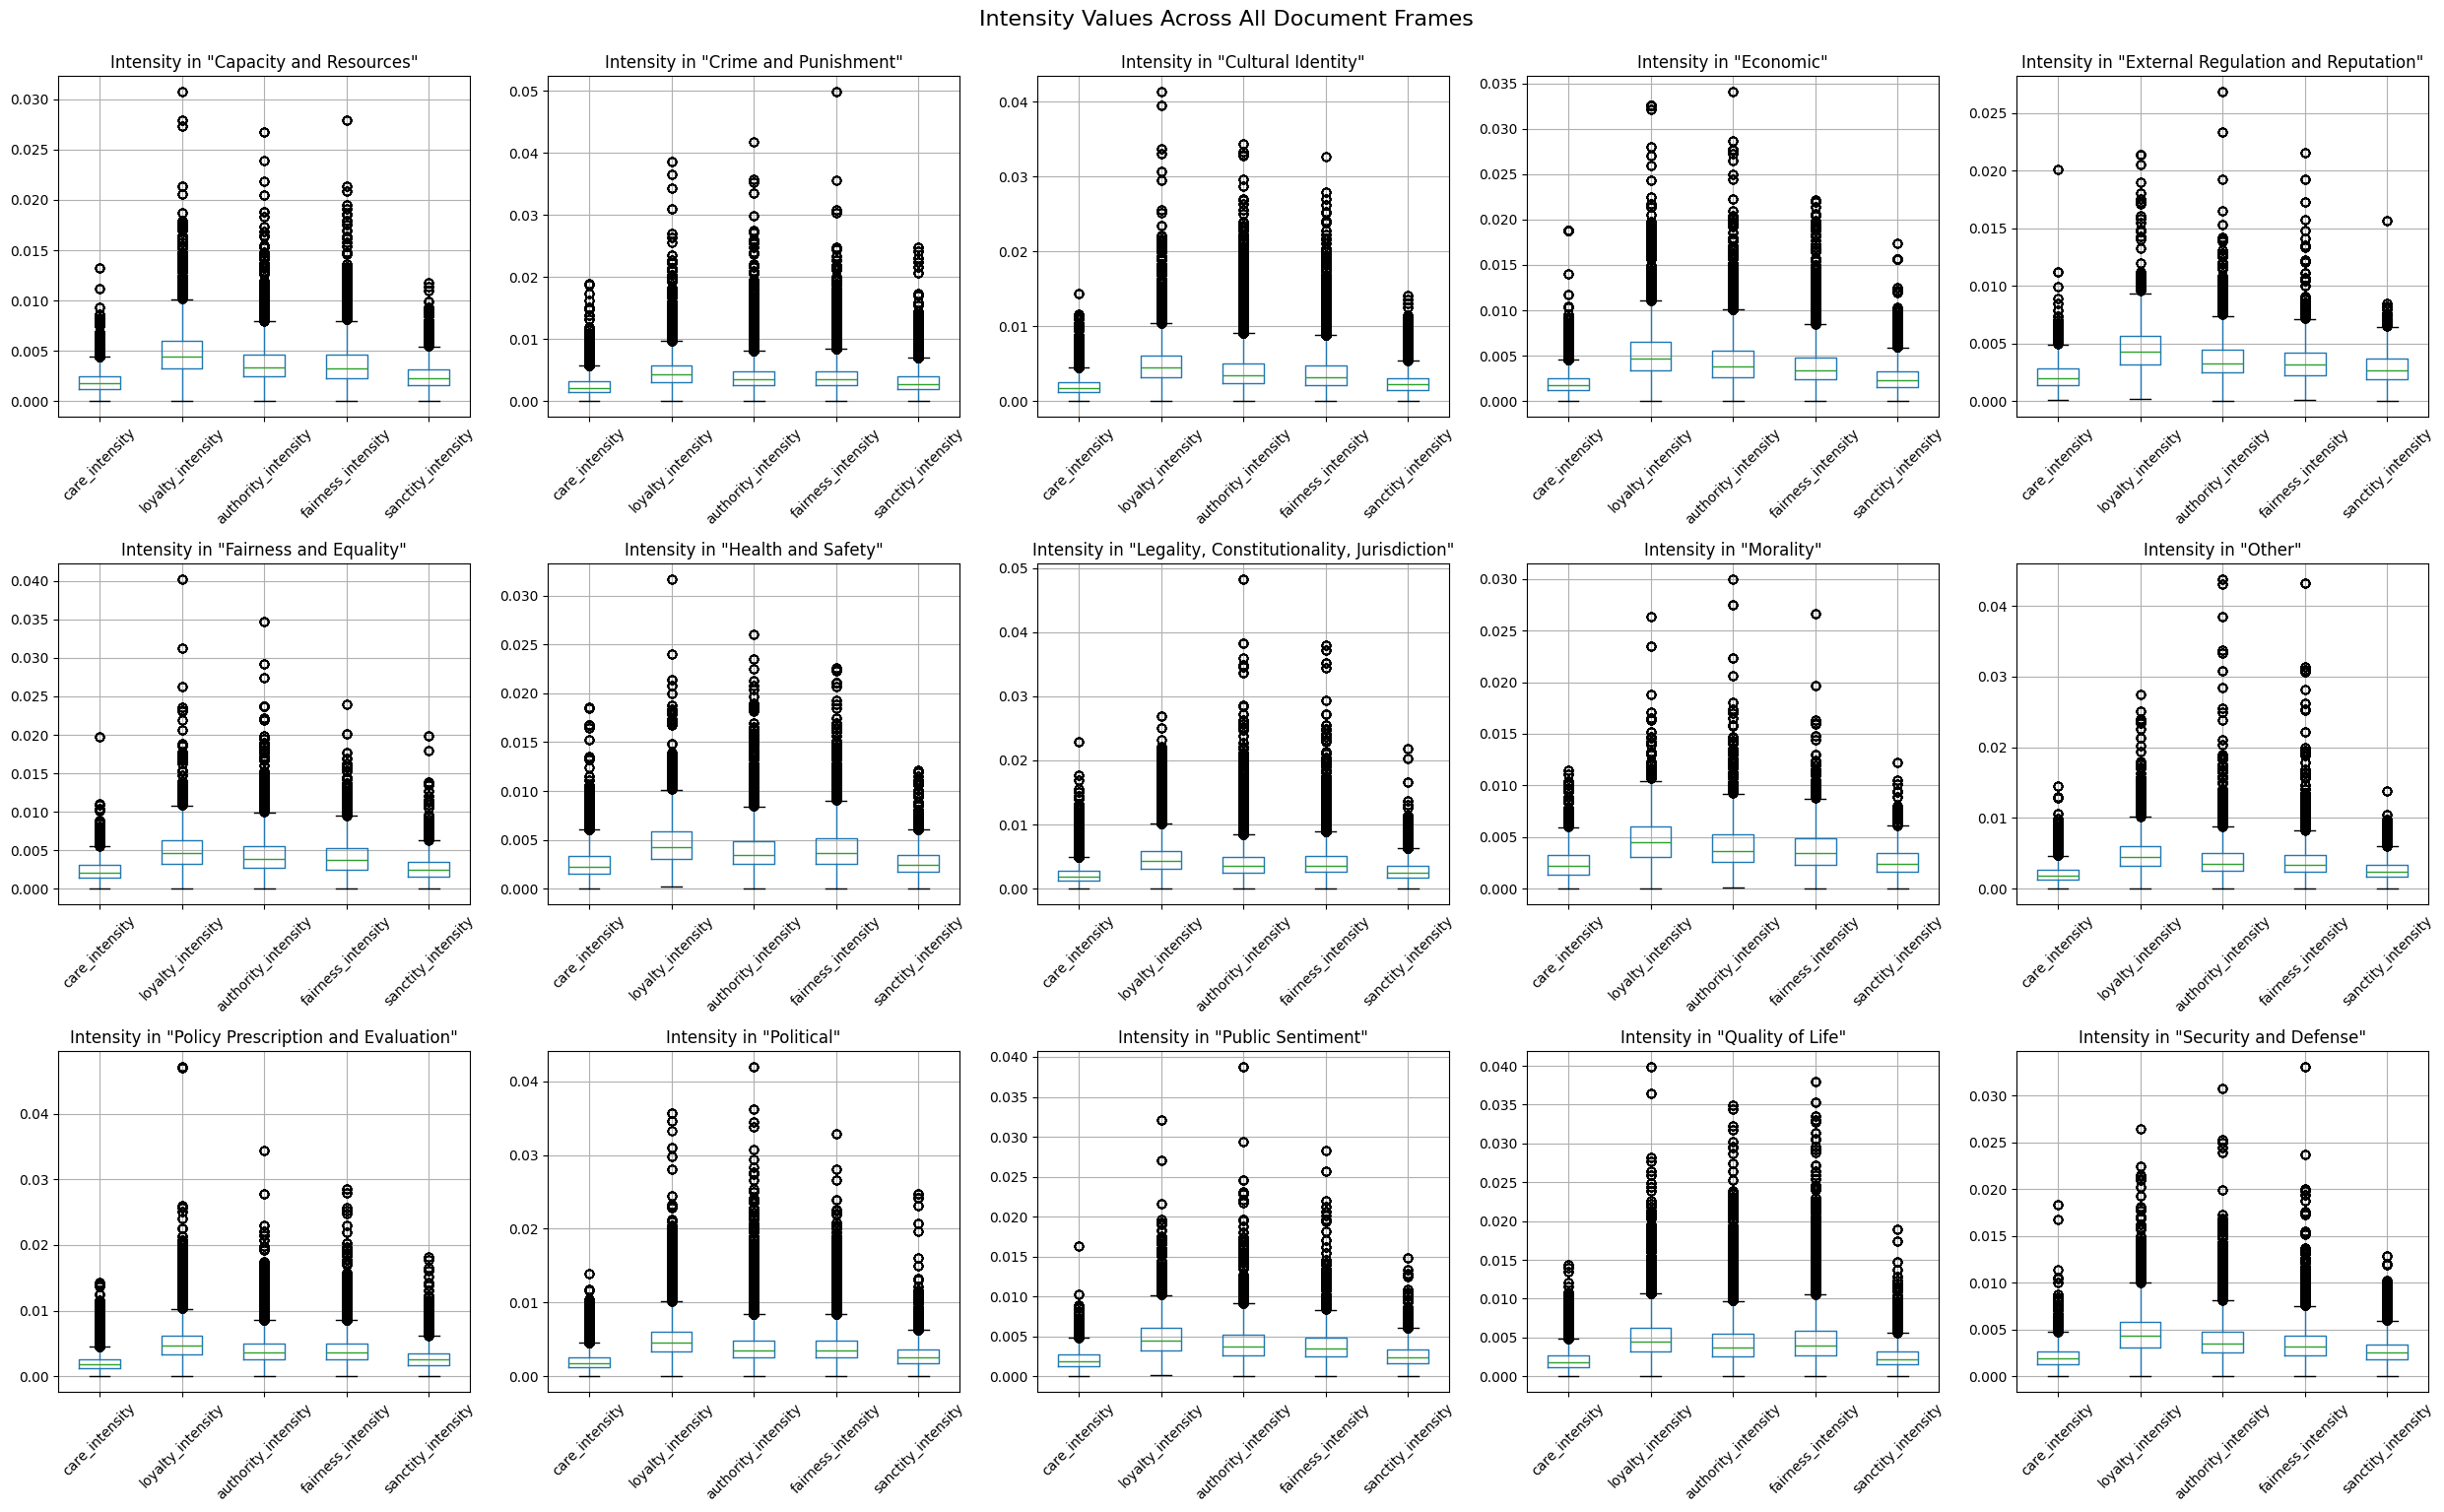

In [176]:
# Adjusting the plotting to accommodate all 15 frames
plt.figure(figsize=(25, 15))

# Plotting Bias Values for all 15 frames
for i, (frame, group) in enumerate(grouped, start=1):
    plt.subplot(3, 5, i)  # Adjusting the subplot grid to 3 rows by 5 columns
    group[bias_columns].boxplot()
    plt.title(f'Bias in "{frame}"')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Bias Values Across All Document Frames', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(25, 15))

# Plotting Intensity Values for all 15 frames
for i, (frame, group) in enumerate(grouped, start=1):
    plt.subplot(3, 5, i)  # Adjusting the subplot grid to 3 rows by 5 columns
    group[intensity_columns].boxplot()
    plt.title(f'Intensity in "{frame}"')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Intensity Values Across All Document Frames', y=1.02, fontsize=16)
plt.show()

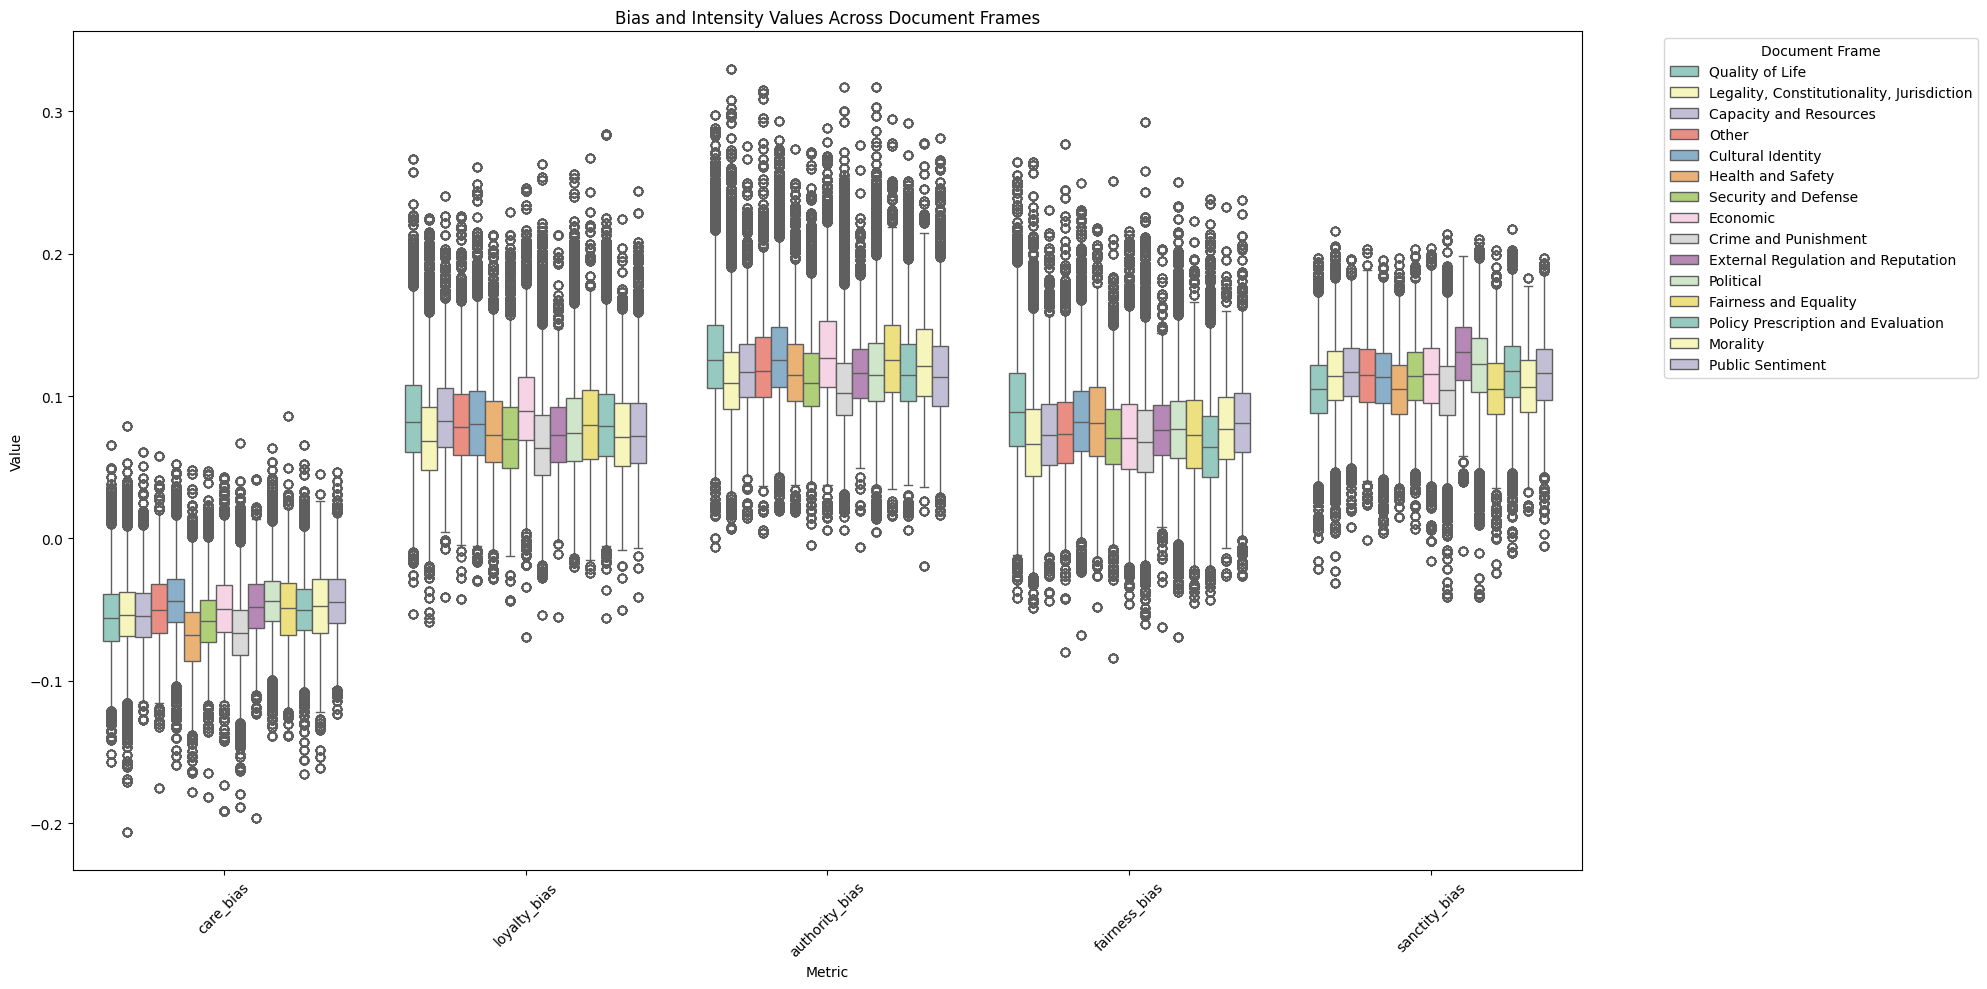

In [177]:
# Melting the DataFrame to have bias and intensity values in single columns with corresponding frame identifiers
melted_bias = df.melt(id_vars=['document_frame'], value_vars=bias_columns, 
                                var_name='Metric', value_name='Value')
melted_bias['Type'] = 'Bias'

# Combining bias and intensity data
combined_data = pd.concat([melted_bias])

# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(x='Metric', y='Value', hue='document_frame', data=combined_data, palette='Set3')
plt.title('Bias and Intensity Values Across Document Frames')
plt.xticks(rotation=45)
plt.legend(title='Document Frame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


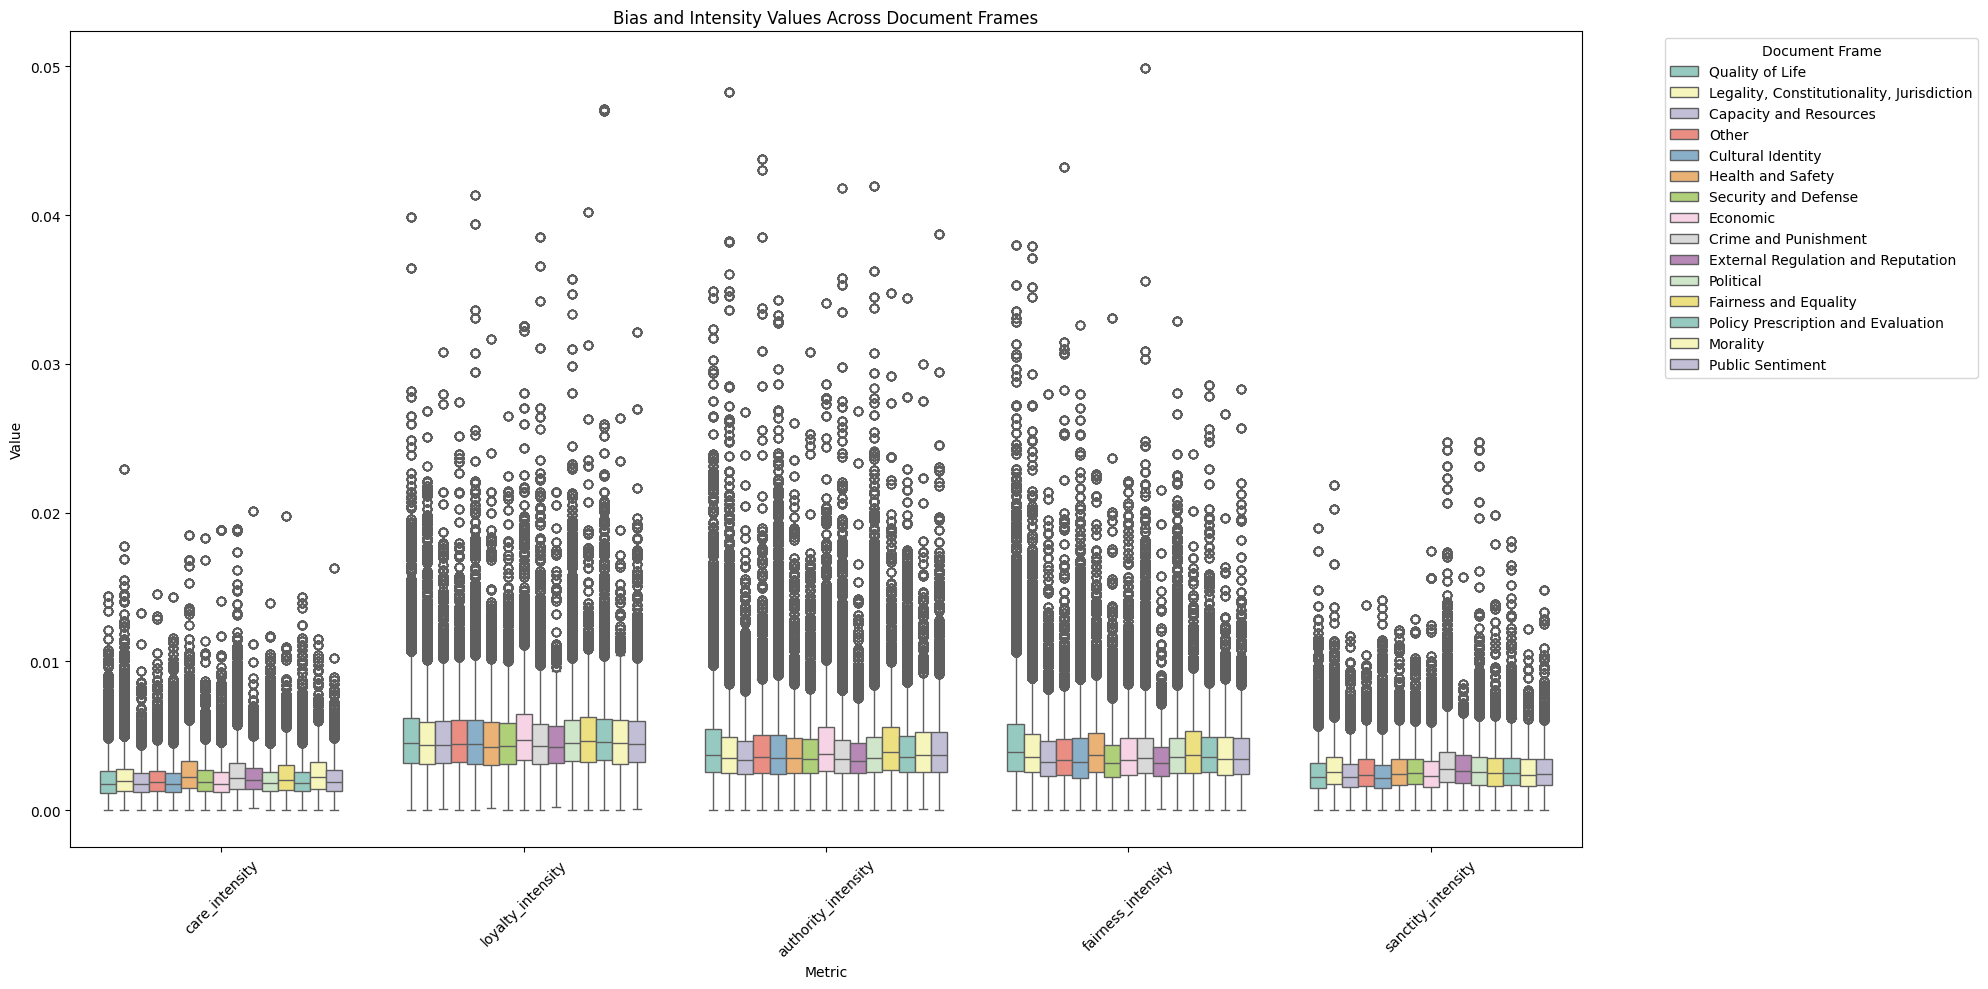

In [178]:
# Melting the DataFrame to have bias and intensity values in single columns with corresponding frame identifiers
melted_intensity = df.melt(id_vars=['document_frame'], value_vars=intensity_columns, 
                                     var_name='Metric', value_name='Value')
melted_intensity['Type'] = 'Intensity'

# Combining bias and intensity data
combined_data = pd.concat([melted_intensity])

# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(x='Metric', y='Value', hue='document_frame', data=combined_data, palette='Set3')
plt.title('Bias and Intensity Values Across Document Frames')
plt.xticks(rotation=45)
plt.legend(title='Document Frame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Example plot for single foundation (bias)

C:\Users\elias\AppData\Local\Temp\ipykernel_29080\3095761594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='document_frame', y='care_bias', data=df, palette='Set2')


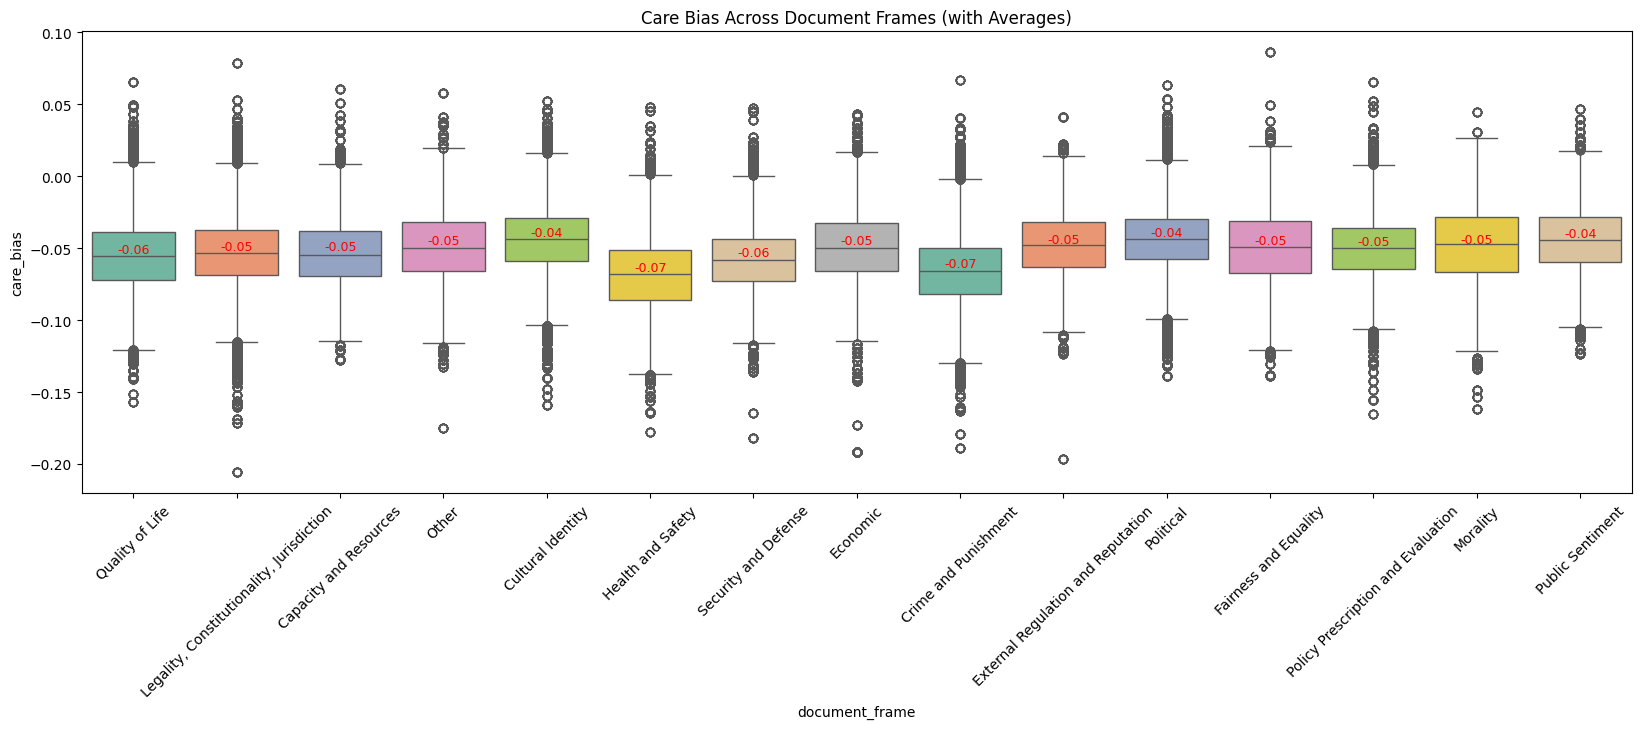

In [179]:
# Calculating the mean value of 'care_bias' for each document frame
means = df.groupby('document_frame')['care_bias'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='document_frame', y='care_bias', data=df, palette='Set2')
plt.title('Care Bias Across Document Frames (with Averages)')

# Annotating each box with the mean value
for i, frame in enumerate(ax.get_xticklabels()):
    frame = frame.get_text()
    mean_val = means.loc[means['document_frame'] == frame, 'care_bias'].values[0]
    plt.text(i, mean_val, f'{mean_val:.2f}', fontsize=9, ha='center', va='bottom', color='red')

plt.xticks(rotation=45)
plt.show()


C:\Users\elias\AppData\Local\Temp\ipykernel_29080\119036587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='document_frame', y='care_intensity', data=df, palette='Set2')


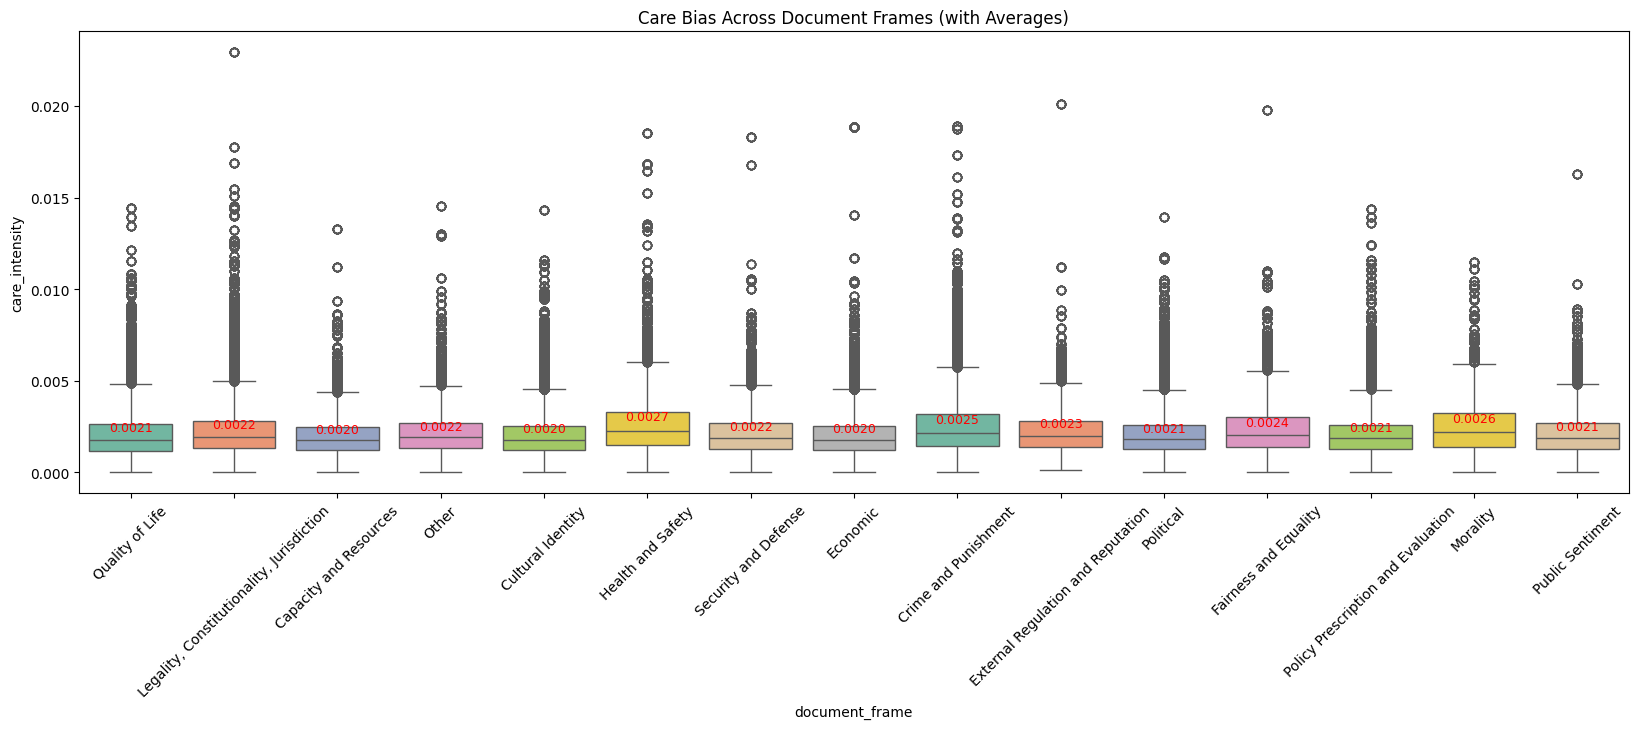

In [180]:
# Calculating the mean value of 'care_bias' for each document frame
means = df.groupby('document_frame')['care_intensity'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='document_frame', y='care_intensity', data=df, palette='Set2')
plt.title('Care Bias Across Document Frames (with Averages)')

# Annotating each box with the mean value
for i, frame in enumerate(ax.get_xticklabels()):
    frame = frame.get_text()
    mean_val = means.loc[means['document_frame'] == frame, 'care_intensity'].values[0]
    plt.text(i, mean_val, f'{mean_val:.4f}', fontsize=9, ha='center', va='bottom', color='red')

plt.xticks(rotation=45)
plt.show()


# Example plot for a single foundation with bias on the x-axis and intensity on the y-axis

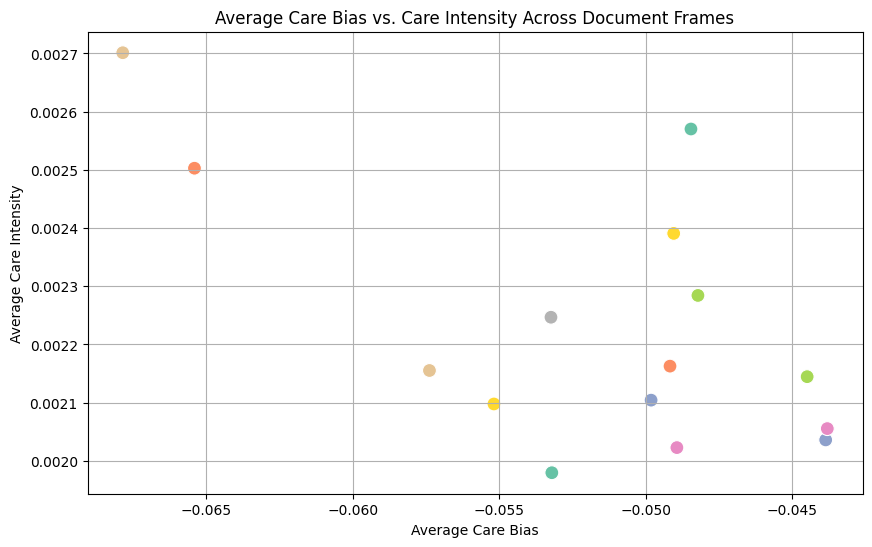

In [181]:
# Calculating the average 'care_bias' and 'care_intensity' for each document frame
frame_averages = df.groupby('document_frame').agg({'care_bias': 'mean', 'care_intensity': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='care_bias', y='care_intensity', data=frame_averages, hue='document_frame', palette='Set2', s=100, legend=False)
plt.title('Average Care Bias vs. Care Intensity Across Document Frames')
plt.xlabel('Average Care Bias')
plt.ylabel('Average Care Intensity')
plt.grid(True)
plt.show()

In [182]:
document_frames = ['Quality of Life', 'Economic', 'Health and Safety', 'Morality', 'Fairness and Equality']

def remove_outliers_fixed_distance(group, max_distance=0.5):
    # Calculate the mean for care_bias and care_intensity
    care_bias_mean = group['care_bias'].mean()
    care_intensity_mean = group['care_intensity'].mean()
    
    # Calculate the absolute difference from the mean
    group['bias_diff'] = (group['care_bias'] - care_bias_mean).abs()
    group['intensity_diff'] = (group['care_intensity'] - care_intensity_mean).abs()
    
    # Filter out rows where the difference is greater than the max_distance
    filtered_group = group[(group['bias_diff'] <= max_distance) & 
                           (group['intensity_diff'] <= max_distance)]
    
    # Drop the temporary columns
    filtered_group = filtered_group.drop(columns=['bias_diff', 'intensity_diff'])
    
    return filtered_group


# Apply the function to remove outliers for each frame individually and reset the index
filtered_df = df.groupby('document_frame').apply(remove_outliers_fixed_distance, max_distance=0.005).reset_index(drop=True)

# Now calculate the averages after filtering for the KDE plots
filtered_averages = filtered_df.groupby('document_frame').agg({'care_bias': 'mean', 'care_intensity': 'mean'}).reset_index()

filtered_df.shape, filtered_df.columns

((147995, 13),
 Index(['article_id', 'text', 'document_frame', 'care_bias', 'care_intensity',
        'loyalty_bias', 'loyalty_intensity', 'authority_bias',
        'authority_intensity', 'fairness_bias', 'fairness_intensity',
        'sanctity_bias', 'sanctity_intensity'],
       dtype='object'))

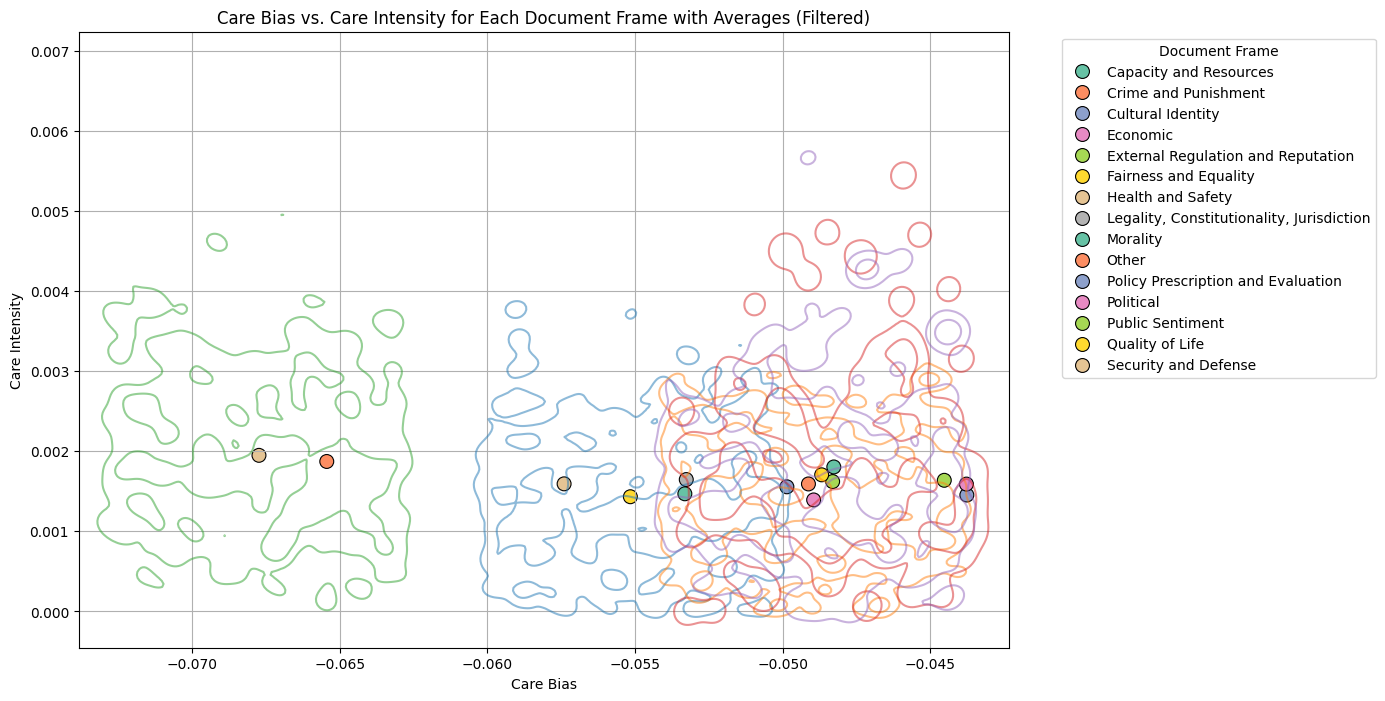

In [183]:
# Plotting the filtered data with averages
plt.figure(figsize=(12, 8))


# Scatter plot for the averages
sns.scatterplot(data=filtered_averages, x='care_bias', y='care_intensity', 
                hue='document_frame', palette='Set2', s=100, legend='brief', edgecolor='k')

# KDE plot for the distribution of filtered points, avoiding outliers
for frame in document_frames:
    subset = filtered_df[filtered_df['document_frame'] == frame]
    sns.kdeplot(x=subset['care_bias'], y=subset['care_intensity'], 
                bw_adjust=0.5, levels=3, alpha=0.5, thresh=0.1, label=frame)

# Finalizing the plot
plt.title('Care Bias vs. Care Intensity for Each Document Frame with Averages (Filtered)')
plt.xlabel('Care Bias')
plt.ylabel('Care Intensity')
plt.legend(title='Document Frame', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()